In [14]:
# Importing piplite to install non-default libraries
import piplite
await piplite.install('seaborn')
await piplite.install("scikit-learn")

In [15]:
# importing other useful libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression

In [24]:
# Setting the file path to your dataset
# NOTE:file should be present currently on workspace before running
file_path = 'finclub_dataset.csv'

# Loading the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# To check 
print(df.describe())  # Statistical summary of the dataset

        Unnamed: 0        Price      Signal1      Signal2      Signal3  \
count  3000.000000  3000.000000  3000.000000  2998.000000  2998.000000   
mean   1499.500000  2495.633977  2048.124629  2001.826284  2377.852182   
std     866.169729   626.039680   401.765939   377.170717   265.373317   
min       0.000000  1150.101000  1238.331000  1014.435900  2035.200900   
25%     749.750000  2060.030250  1686.693250  1690.910100  2170.494125   
50%    1499.500000  2321.707000  2124.694000  2053.757250  2279.034450   
75%    2249.250000  3044.440750  2383.497750  2305.277775  2733.506075   
max    2999.000000  3762.695000  2807.346000  2982.138300  2874.594600   

           Signal4      Signal5      Signal6      Signal7  
count  2998.000000  3000.000000  2998.000000  2998.000000  
mean   1636.205521  1963.481103  2815.552929  7671.653672  
std     513.544763   321.111659  1684.399434  1600.081355  
min     783.312400  1298.750700   150.960000  4724.419000  
25%    1254.797625  1713.741950  

In [25]:
# Data Cleaning and Preprocessing
# Handle missing values
df = df.dropna()  # Drop rows with missing values

# Remove duplicate rows
df = df.drop_duplicates()

# Reset the index if needed
df = df.reset_index(drop=True)

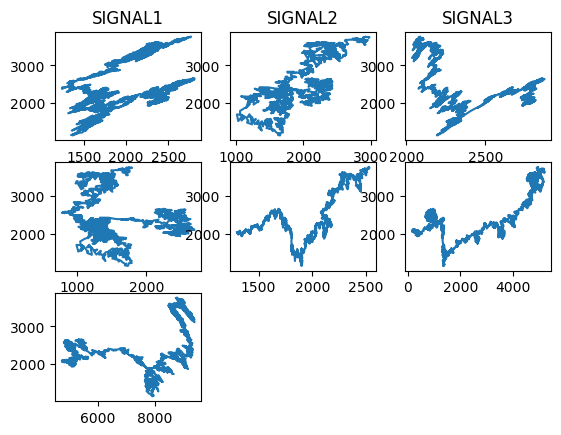

In [32]:
# Plotting the price over signal1
# plt.figure(figsize=(12, 6))
# plt.plot(df['Signal1'], df['Price'])
# plt.xlabel('Signal1')
# plt.ylabel('Price')
# plt.title('Asset Price Over signal1')
# plt.show()

plt.subplot(3, 3, 1);
plt.plot(df['Signal1'], df['Price'])
plt.title('SIGNAL1')
plt.subplot(3, 3, 2);
plt.plot(df['Signal2'], df['Price'])
plt.title('SIGNAL2')
plt.subplot(3, 3, 3);
plt.plot(df['Signal3'], df['Price'])
plt.title('SIGNAL3')
plt.subplot(3, 3, 4);
plt.plot(df['Signal4'], df['Price'])
plt.subplot(3, 3, 5);
plt.plot(df['Signal5'], df['Price'])
plt.subplot(3, 3, 6);
plt.plot(df['Signal6'], df['Price'])
plt.subplot(3, 3, 7);
plt.plot(df['Signal7'], df['Price'])
plt.show()


<ipython-input-37-5cbba421c90d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.iloc[:, 1:].corr()  # Calculate correlation matrix


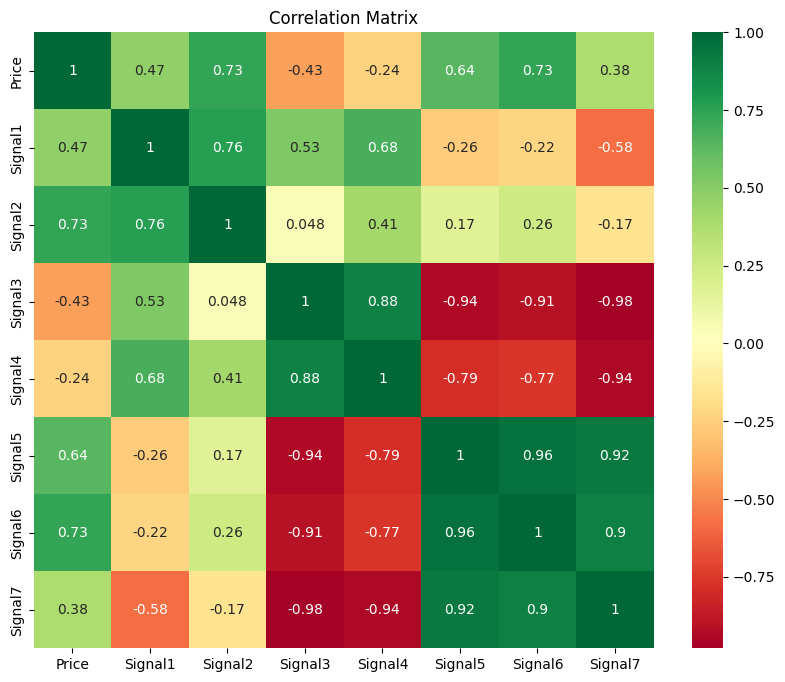

In [37]:
# Correlation Analysis to quantify the strength of relation between signals and Price
correlation_matrix = df.iloc[:, 1:].corr()  # Calculate correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')
plt.title('Correlation Matrix')
plt.show()


In [17]:
# Model the data through linear Regression
X = df.iloc[:, 3:]  # Assignals start from the second column, adjust if necessary
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predicting the values on the testing set
y_pred = model.predict(X_test)


In [19]:
# Evaluating the model by finding MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 26.461740970364602


In [20]:
# Getting the coefficients and intercept of the linear regression model
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:")
for signal, coef in zip(X.columns, coefficients):
    print(f"{signal}: {coef}")
print(f"Intercept: {intercept}")



Coefficients:
Signal1: 0.6222840977936135
Signal2: 0.9683151625750697
Signal3: -0.005331078097069675
Signal4: -1.4298718294938875
Signal5: 0.004154179977548397
Signal6: 0.23749560775525974
Signal7: -0.37959973232344957
Intercept: 3870.6480416128434


In [38]:
# Predicting Price on a random dataset
new_signals = {
    'Signal1': [2713.03],
    'Signal2': [2891.8071],
    'Signal3': [2080.6181],
    'Signal4': [1750.7841],
    'Signal5': [2522.8578],
    'Signal6': [4965.36],
    'Signal7': [8835.0088]
}
new_data = pd.DataFrame(new_signals)

# Make predictions on the new data
predicted_prices = model.predict(new_data)

# Print the predicted prices
print(predicted_prices)


[3680.57994865]
